# Support Vector Machine

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns ; sns.set()

In [6]:
from sklearn.datasets.samples_generator import make_blobs

In [8]:
X, Y = make_blobs(n_samples=50 ,centers =2 , random_state=0 , cluster_std=0.6)

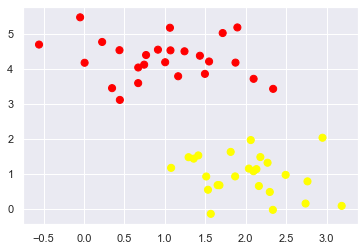

In [9]:
plt.scatter(X[:,0], X[:,1] , c =Y , s=50 , cmap ="autumn")

(-1, 3.5)

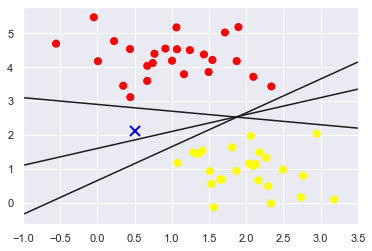

In [14]:
xx = np.linspace(-1 , 3.5)
plt.scatter(X[:,0], X[:,1], c =Y ,s= 50 , cmap="autumn")
plt.plot([0.5 ] ,[2.1]  , "x" , color = "blue", markeredgewidth =2 , markersize=10)

for a, b in [(1,0.65),(0.5,1.6), (-0.2,2.9)]:
    yy = a* xx+b
    plt.plot(xx,yy,"-k")
plt.xlim(-1,3.5)

In [ ]:
## Maximizacion del margen

(-1, 3.5)

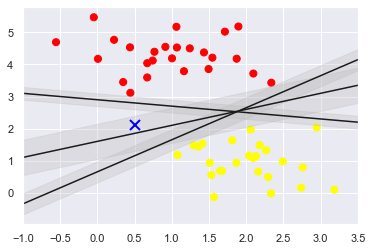

In [15]:
xx = np.linspace(-1 , 3.5)
plt.scatter(X[:,0], X[:,1], c =Y ,s= 50 , cmap="autumn")
plt.plot([0.5 ] ,[2.1]  , "x" , color = "blue", markeredgewidth =2 , markersize=10)

for a, b , d in [(1,0.65,0.33),(0.5,1.6,0.55), (-0.2,2.9, 0.2)]:
    yy = a* xx+b
    plt.plot(xx,yy,"-k")
    plt.fill_between(xx ,yy-d , yy+d, edgecolor="none", color="#BBBBBB", alpha = 0.3)
plt.xlim(-1,3.5)

In [16]:
## Creacion del modelo SVM

In [17]:
from sklearn.svm import SVC


In [18]:
model = SVC(kernel="linear", C= 1E10)
model.fit(X,Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
def plt_scv(model, ax= None, plot_support =True):
    """Plot de la funcion de decision para una clasificacion en 2d con svc"""\
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim= ax.get_ylim()
    
    ##Generamos la parrilla para evaluar el modelo 
    xx = np.linespace(xlim[0], xlim[1],30)
    yy = np.linespace(ylim[0], ylim[1],30)
    Y, X =np.meshgrid(yy,xx)  
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p  = model.decision_function(xy).reshape(X.shape)
    
    
    ## Representamos las fronteras y los margenes del svc
    ax.contour(xx,yy,P, colors="k" , levels=[-1,0,1], alpha = 0.5 ,linestyles =["--", "-", "--"])
    
    print(model.support_vectors_)

    
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0]
                   moedl.support_vectors_[:,1]
                   s=300 , linewidth=1, facecolors ="none")
    
    
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    
                   

SyntaxError: invalid syntax (<ipython-input-25-cb80fba9baf6>, line 3)

In [29]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


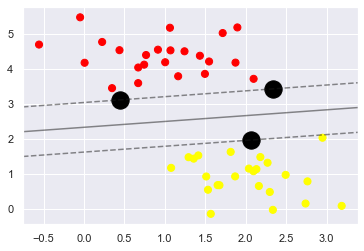

In [30]:
plt.scatter(X[:,0] , X[:,1], c = Y , s = 50 , cmap = "autumn")
plt_svc(model)

In [42]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)
    

    


[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


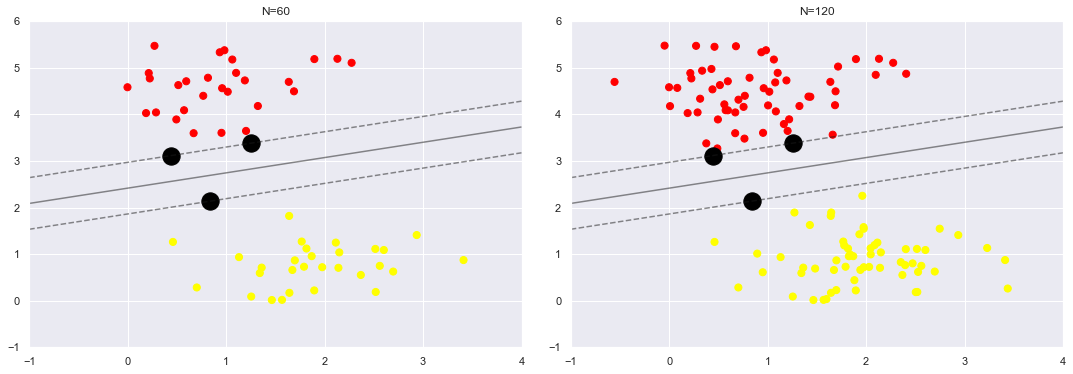

In [43]:
fig , ax = plt.subplots(1,2, figsize = (16,6))
fig.subplots_adjust(left=0.0625 , right= 0.96 , wspace = 0.1)
for ax_i ,N in zip(ax,[60, 120]):
    plot_svm(N,ax_i)
    ax_i.set_title("N={0}".format(N))

In [45]:
from ipywidgets import interact , fixed
interact

In [48]:
interact(plot_svm , N=[10,200, 100000] , ax= fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200, 100000), value=10), Output()), _dom_classes=…

<function __main__.plot_svm(N=10, ax=None)>